In this lab we're going to do simple data exploration using Pandas. Our objective is to learn basic operations that aid in visual data exploration.

<br>

First, let's import our required libraries and read in the data.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


cwd = os.getcwd()

#If on MAC, this will likely work
datadir = '/'.join(cwd.split('/')[0:-1]) + '/data/'
#If on window's machine, explicitly put in data dir
#datadir = 

%matplotlib inline

In [6]:
#Now read in the dataset loansdata.csv
loansData = pd.read_csv(datadir + 'loansdata.csv')

The full schema can be found <a href="https://github.com/herrfz/dataanalysis/blob/master/assignment1/Assignment1.pdf">here</a>, but let's use native Pandas methods to also explore the data. Although not specified above, this csv has row headers and the read_csv function implicitly knows this. <br>

Let's take a look at the column names, in a nicely readable way:

In [7]:
print("Column Names Are:")
print("")

for column_name in loansData.columns.values:
    print(column_name)

print("")
print('Total # of Columns = {}'.format(len(loansData.columns)))

Column Names Are:

CustNUm
Amount.Requested
Amount.Funded.By.Investors
Interest.Rate
Loan.Length
Loan.Purpose
Debt.To.Income.Ratio
State
Home.Ownership
Monthly.Income
FICO.Range
Open.CREDIT.Lines
Revolving.CREDIT.Balance
Inquiries.in.the.Last.6.Months
Employment.Length

Total # of Columns = 15


It is oftentimes helpful to take a quick glance at the first few records (when possible). This is an easy way to discover basic data flaws (i.e., all nulls, misaligned fields, etc.). We can do this in Pandas very easily.

In [8]:
loansData.head().transpose() #We transpose it so it will fit in the display window

,0,1,2,3,4
CustNUm,81174,99592,80059,15825,33182
Amount.Requested,20000,19200,35000,10000,12000
Amount.Funded.By.Investors,20000,19200,35000,9975,12000
Interest.Rate,8.90%,12.12%,21.98%,9.99%,11.71%
Loan.Length,36 months,36 months,60 months,36 months,36 months
Loan.Purpose,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,credit_card
Debt.To.Income.Ratio,14.90%,28.36%,23.81%,14.30%,18.78%
State,SC,TX,CA,KS,NJ
Home.Ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
Monthly.Income,6541.67,4583.33,11500,3833.33,3195


Next, let's run a quick line to get summary statistics of the numeric fields.

In [9]:
loansData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustNUm,2500.0,51631.597200,30053.345508,10.00,26523.00,50653.0,77580.50,104202.0
Amount.Requested,2500.0,12406.500000,7801.544872,1000.00,6000.00,10000.0,17000.00,35000.0
Amount.Funded.By.Investors,2500.0,12001.573236,7745.320754,-0.01,6000.00,10000.0,16000.00,35000.0
Monthly.Income,2499.0,5688.931321,3963.118185,588.50,3500.00,5000.0,6800.00,102750.0
Open.CREDIT.Lines,2498.0,10.075661,4.508644,2.00,7.00,9.0,13.00,38.0
Revolving.CREDIT.Balance,2498.0,15244.559648,18308.549795,0.00,5585.75,10962.0,18888.75,270800.0
Inquiries.in.the.Last.6.Months,2498.0,0.906325,1.231036,0.00,0.00,0.0,1.00,9.0


Let's now focus on a single column, 'Monthly.Income.' First things first, let's display the first five records of just this field.

In [13]:
#Student input line here
loansData['Monthly.Income'][0:5]

0     6541.67
1     4583.33
2    11500.00
3     3833.33
4     3195.00
Name: Monthly.Income, dtype: float64

Let's try and understand the distribution of this field. We can do this using the hist() method and matplotlib.

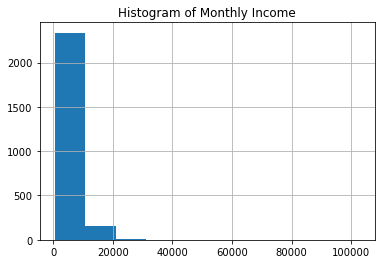

In [15]:
plt.figure()
hist_inc = loansData['Monthly.Income'].hist()
plt.title('Histogram of Monthly Income')
plt.show()

How would you characterize the shape of this distribution? Is there anything we can do to the income variable to make the distribution more bell curved? Let's create a new column in the dataframe called 'Monthly.LogIncome' and print a histogram of it. What might be some advantages of making such a transformation?
<br>


In [18]:
#Student: Add a new column Monthly.LogIncome to the dataset that is the log of the Monthly.Income columne
loansData['Monthly.LogIncome'] = np.log(loansData['Monthly.Income'])

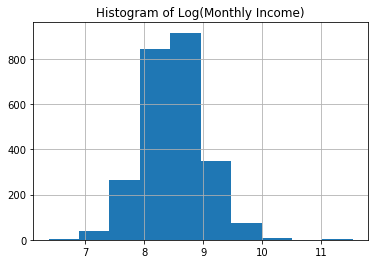

In [19]:
#Now look at the distribution
plt.figure()
h = loansData['Monthly.LogIncome'].hist()
plt.title('Histogram of Log(Monthly Income)')
plt.show()

Now let's answer some questions about the data.

<b>Q1: What is the cardinality (i.e., # of distinct values) for 'Interest.Rate' and 'FICO.Range'</b>

In [39]:
#Student input code here - hint, the 'describe()' method returns a useful dataframe
print(loansData['Interest.Rate'].describe()['unique'])
print(loansData['FICO.Range'].describe()['unique'])

275
38


<b>Q2: What data type did Pandas set fo Interest.Rate? Can we create a new field which is stored as a float?</b>

In [46]:
#Student input code here - show the field type
loansData['Interest.Rate'].str.strip('%').astype(float)[0]

8.9000000000000004

In the cell below, create a new field 'Interest.Rate.Num' where 'Interest.Rate' is converted to a float. Hint: this can be done in one line using the .str assessor, strip and astype methods.

In [47]:
#Student input code here - convert field to a float using the '.str' assessor
loansData['Interest.Rate.Num'] = loansData['Interest.Rate'].str.strip('%').astype(float)

<b>Q3: Can we get a sense of the relationship between monthly income and interest rate? Use the scatter() function from Matplotlib.</b>

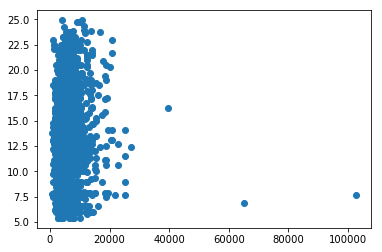

In [50]:
#Student input line here
plt.scatter(loansData['Monthly.Income'], loansData['Interest.Rate.Num'])

Given the skewed distribution of Income, is this chart visually helpful? Let's try the Log of income instead.

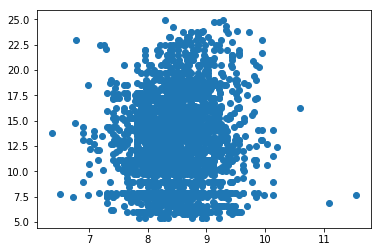

In [51]:
#Student input code here
plt.scatter(np.log(loansData['Monthly.Income']), loansData['Interest.Rate.Num'])

<b>Q4: What is the average interest rate for each FICO range?</b> <br>
Hint: use the groupby() method in Pandas.

In [59]:
#Student input code here
fico_grp = loansData[['FICO.Range', 'Interest.Rate.Num']].groupby('FICO.Range')

In [61]:
fico_grp.head()

,FICO.Range,Interest.Rate.Num
0,735-739,8.90
1,715-719,12.12
2,690-694,21.98
3,695-699,9.99
4,695-699,11.71
5,670-674,15.31
6,720-724,7.90
7,705-709,17.14
8,685-689,14.33
9,715-719,6.91
